In [1]:
import numpy as np

img = np.array([[0, -8, -3, -2],
                [1, 9, -8, 0],
                [9, -4, 5, -9],
                [6, -4, 6, 3]])

kernel = np.array([[4, -5, 4],
                   [-6, -8, -2],
                   [1, 5, 5]])

kernel_mirror = np.flipud(np.fliplr(kernel))

conv = np.array([
    [(img[:-1, :-1] * kernel_mirror).sum(), (img[:-1, 1:] * kernel_mirror).sum()],
    [(img[1:, :-1] * kernel_mirror).sum(), (img[1:, 1:] * kernel_mirror).sum()]
])
conv

array([[  7, -88],
       [ 94,  -7]])

C:\Users\stacy\AppData\Local\Temp\ipykernel_22824\3379604116.py:10: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(img_filtered)


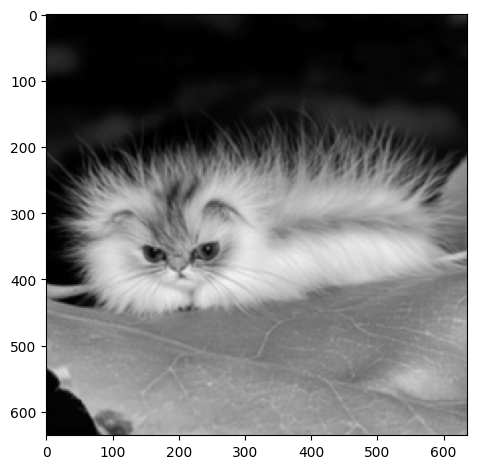

In [3]:
from skimage.io import imread, imshow, imsave
from scipy.signal import convolve2d
import numpy as np

img = imread('image.png', 1)
kernel_size = 5
kernel = np.ones((kernel_size, kernel_size))

img_filtered = (convolve2d(img, kernel, mode='valid') / kernel_size ** 2).astype('uint8')
imshow(img_filtered)
imsave('my-box.png', img_filtered)

C:\Users\stacy\AppData\Local\Temp\ipykernel_22824\956582502.py:10: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(img_integral_normalized_byte)


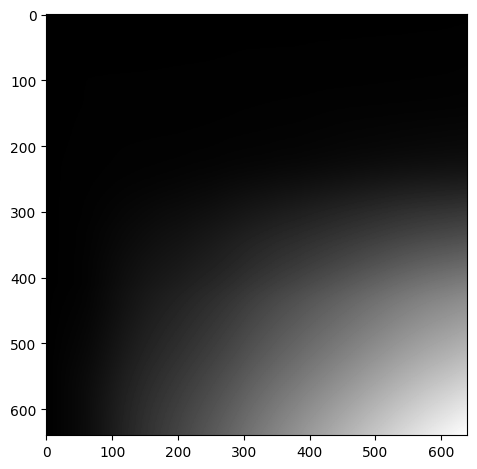

In [4]:
from skimage.io import imread, imshow
from skimage.transform import integral_image, integrate
from skimage import img_as_ubyte
import numpy as np

img = imread('image.png', 1)
img_integral = integral_image(img)
img_integral_normalized = (img_integral - img_integral.min()) / (img_integral.max() - img_integral.min())
img_integral_normalized_byte = img_as_ubyte(img_integral_normalized)
imshow(img_integral_normalized_byte)


In [ ]:
import math

sigma, x, y = map(int, input().split())
G = 1 / (2 * math.pi * sigma ** 2) * math.exp(-(x ** 2 + y ** 2) / (2 * sigma ** 2))
print(G)

In [ ]:
import math, numpy as np

sigma = float(input())
half = round(3 * sigma)
k = round(half * 2 + 1)

kernel = []
for i in reversed(range(-half, half + 1)):
    for j in range(-half, half + 1):
        kernel.append((j, i))
kernel = (np.array(kernel).reshape(k, k, 2)).tolist()

for i in range(k):
    for j in range(k):
        kernel[i][j] = 1 / (2 * math.pi * sigma ** 2) * \
                       math.exp(-(kernel[i][j][0] ** 2 + kernel[i][j][1] ** 2) / (2 * sigma ** 2))
sum = np.array(kernel).sum()
for i in range(k):
    for j in range(k):
        kernel[i][j] = kernel[i][j] / sum
kernel

C:\Users\stacy\AppData\Local\Temp\ipykernel_22824\1525849028.py:25: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(img_filtered)


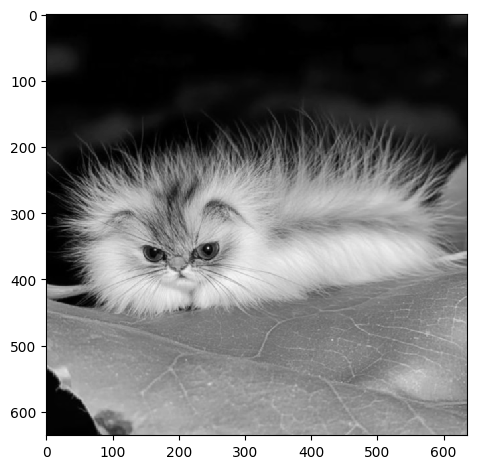

In [5]:
from skimage.io import imread, imshow, imsave
from scipy.signal import convolve2d
import math, numpy as np

img = imread('image.png', 1)
sigma = 0.66
half = round(3 * sigma)
k = half * 2 + 1

kernel = []
for i in reversed(range(-half, half + 1)):
    for j in range(-half, half + 1):
        kernel.append((j, i))
kernel = (np.array(kernel).reshape(k, k, 2)).tolist()
for i in range(k):
    for j in range(k):
        kernel[i][j] = 1 / (2 * math.pi * sigma ** 2) * \
                       math.exp(-(kernel[i][j][0] ** 2 + kernel[i][j][1] ** 2) / (2 * sigma ** 2))
sum = np.array(kernel).sum()
for i in range(k):
    for j in range(k):
        kernel[i][j] = kernel[i][j] / sum

img_filtered = (convolve2d(img, kernel, mode='valid')).astype('uint8')
imshow(img_filtered)
imsave('gauss-my.png', img_filtered)

C:\Users\stacy\AppData\Local\Temp\ipykernel_22824\2644057532.py:21: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(out_img)


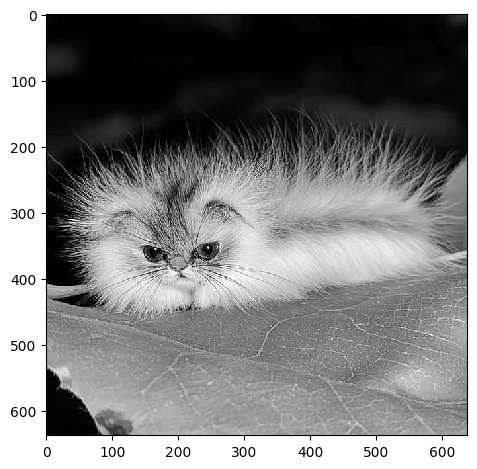

In [6]:
from skimage.io import imread, imshow, imsave
import numpy as np

img = imread('image.png', 1)

kernel = np.array([
    [-1, -2, -1],
    [-2, 22, -2],
    [-1, -2, -1]
]) / 10

n_rows, n_columns = img.shape
out_img = np.zeros((n_rows, n_columns))

for i in range(1, n_rows - 1):
    for j in range(1, n_columns - 1):
        out_img[i, j] = np.clip((img[i-1:i+2, j-1:j+2] * kernel).sum(), 0, 255)

out_img = out_img[1:n_rows - 1, 1:n_columns - 1].astype('uint8')
imsave('sharp-my.png', out_img)
imshow(out_img)